In [2]:
import json
import pickle
from rdkit import Chem
from rdkit.Chem import RDConfig
import os
import sys
sys.path.append(os.path.join(RDConfig.RDContribDir, 'SA_Score'))
import sascorer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
with open("../test_set_sim_search.pkl", "rb") as f:
    test_set_smiles_to_train_set_diff_vector_and_distance = pickle.load(f)
test_set_smiles_to_train_set_diff_vector_and_distance

{'COc1ccccc1N1CCN(CC(O)COc2cccc3ccccc23)CC1_0': {'min_euclidean_dist': {'smile': 'CNC(=O)Oc1ccc2c(c1)C1(C)CCN(C)C1N2C_4356',
   'dist': 7.569423},
  'min_cosine_sim': {'smile': 'CCN(CC)CCNC(=O)c1c(C)[nH]c(C=C2C(=O)Nc3ccc(Cl)cc32)c1C_51119',
   'dist': -4.50906e-06},
  'max_cosine_sim': {'smile': 'COc1ccccc1N1CCN(CCCCN2C(=O)c3ccccc3C2=O)CC1_58004',
   'dist': 2.869751e-06}},
 'COc1ccccc1N1CCN(CC(O)COc2cccc3ccccc23)CC1_1': {'min_euclidean_dist': {'smile': 'CN(CCOc1ccc(CC2SC(=O)NC2=O)cc1)c1ccccn1_10031',
   'dist': 6.8265467},
  'min_cosine_sim': {'smile': 'CC(=O)C(C#N)C(=O)Nc1cc(Br)ccc1Br_3570',
   'dist': -1.1796407e-06},
  'max_cosine_sim': {'smile': 'OC1(c2ccc(Cl)c(C(F)(F)F)c2)CCN(CCCC(c2ccc(F)cc2)c2ccc(F)cc2)CC1_21393',
   'dist': 1.384695e-06}},
 'COc1ccccc1N1CCN(CC(O)COc2cccc3ccccc23)CC1_2': {'min_euclidean_dist': {'smile': 'CC1(C)SC2C(N=CN3CCCCCC3)C(=O)N2C1C(=O)O_37665',
   'dist': 7.199553},
  'min_cosine_sim': {'smile': 'CCN(CC)CCNC(=O)c1c(C)[nH]c(C=C2C(=O)Nc3ccc(Cl)cc32)c1C_511

In [4]:
tmp3_df = pd.read_csv("../test_set_similarity_search_structural_similarities.csv")
tmp3_df.head()

,m_fp_tanimoto_sim,maccs_fp_tanimoto_sim,fraggle_sims,dist_type
0,0.098214,0.472222,0.627219,euclidean_dist
1,0.092437,0.567568,0.494118,euclidean_dist
2,0.110092,0.460526,0.237668,euclidean_dist
3,0.180952,0.578313,0.796875,euclidean_dist
4,0.113402,0.654545,0.685484,euclidean_dist


Text(0.5, 1.0, 'Test Set Similarity Search: Morgan Fingerprint Tanimoto Similarity')

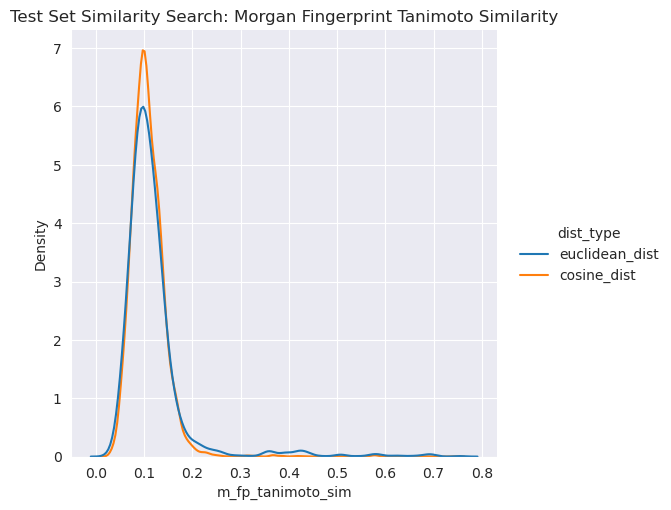

In [5]:
sns.set_style('darkgrid')
sns.displot(tmp3_df,x = 'm_fp_tanimoto_sim',  hue="dist_type", kind = 'kde')

plt.title('Test Set Similarity Search: Morgan Fingerprint Tanimoto Similarity')

In [6]:
with open("cond_generation_res/ldm_con_vae_test_set_smile_to_max_sim_generated_molecule.pkl", "rb") as f:
    ldm_vae_data = pickle.load(f)

In [7]:
ldm_vae_data

{'COc1ccccc1N1CCN(CC(O)COc2cccc3ccccc23)CC1_153': {'max_morgan_fp_tanimoto_sim': 0.15671641791044777,
  'max_maccs_fp_tanimoto_sim': 0.6483516483516484,
  'max_fraggle_sim': 0.5441176470588235},
 'COc1ccccc1N1CCN(CC(O)COc2cccc3ccccc23)CC1_154': {'max_morgan_fp_tanimoto_sim': 0.1592920353982301,
  'max_maccs_fp_tanimoto_sim': 0.46987951807228917,
  'max_fraggle_sim': 0.5482456140350878},
 'COc1ccccc1N1CCN(CC(O)COc2cccc3ccccc23)CC1_155': {'max_morgan_fp_tanimoto_sim': 0.1588785046728972,
  'max_maccs_fp_tanimoto_sim': 0.6777777777777778,
  'max_fraggle_sim': 0.5458333333333333},
 'COc1ccccc1N1CCN(CC(O)COc2cccc3ccccc23)CC1_156': {'max_morgan_fp_tanimoto_sim': 0.16346153846153846,
  'max_maccs_fp_tanimoto_sim': 0.5517241379310345,
  'max_fraggle_sim': 0.5833333333333334},
 'COc1ccccc1N1CCN(CC(O)COc2cccc3ccccc23)CC1_157': {'max_morgan_fp_tanimoto_sim': 0.14285714285714285,
  'max_maccs_fp_tanimoto_sim': 0.5625,
  'max_fraggle_sim': 0.4626865671641791},
 'COc1ccccc1N1CCN(CC(O)COc2cccc3ccccc2

In [8]:
with open("cond_generation_res/ldm_uncon_aae_test_set_smile_to_max_sim_generated_molecule.pkl", "rb") as f:
    ldm_aae_data = pickle.load(f)
    
with open("cond_generation_res/ldm_con_wae_test_set_smile_to_max_sim_generated_molecule.pkl", "rb") as f:
    ldm_wae_data = pickle.load(f)

In [9]:
def extract_sims(data):
    max_morgan_fp_tanimoto_sim = [value['max_morgan_fp_tanimoto_sim'] for value in data.values()]
    max_maccs_fp_tanimoto_sim = [value['max_maccs_fp_tanimoto_sim'] for value in data.values()]
    max_fraggle_sim = [value['max_fraggle_sim'] for value in data.values()]
    return [max_morgan_fp_tanimoto_sim,max_maccs_fp_tanimoto_sim,max_fraggle_sim]

In [10]:
file_to_sims = {
    "ldm_vae":extract_sims(ldm_vae_data),
    "ldm_aae":extract_sims(ldm_aae_data),
    "ldm_wae":extract_sims(ldm_wae_data),
}

for key in file_to_sims:
    file_to_sims[key].append([key for _ in range(len(file_to_sims[key][0]))])

In [11]:
tmp3_df.shape

(15350, 4)

In [12]:
euc_df = tmp3_df.loc[tmp3_df['dist_type']=='euclidean_dist'].iloc[:1000]
cos_df = tmp3_df.loc[tmp3_df['dist_type']=='cosine_dist'].iloc[:1000]

In [13]:
ref_df = pd.concat([euc_df, cos_df])
ref_df

,m_fp_tanimoto_sim,maccs_fp_tanimoto_sim,fraggle_sims,dist_type
0,0.098214,0.472222,0.627219,euclidean_dist
1,0.092437,0.567568,0.494118,euclidean_dist
2,0.110092,0.460526,0.237668,euclidean_dist
3,0.180952,0.578313,0.796875,euclidean_dist
4,0.113402,0.654545,0.685484,euclidean_dist
...,...,...,...,...
8670,0.089109,0.355263,0.286307,cosine_dist
8671,0.089109,0.355263,0.286307,cosine_dist
8672,0.098592,0.279412,0.226667,cosine_dist
8673,0.070866,0.317647,0.327320,cosine_dist


In [14]:
# ref_df = tmp3_df
dfs = []
for key in file_to_sims:
    new_df = pd.DataFrame(file_to_sims[key]).T
    new_df.columns = ref_df.columns
    dfs.append(new_df)

In [15]:
tgt = pd.concat(dfs + [ref_df])
tgt

,m_fp_tanimoto_sim,maccs_fp_tanimoto_sim,fraggle_sims,dist_type
0,0.156716,0.648352,0.544118,ldm_vae
1,0.159292,0.46988,0.548246,ldm_vae
2,0.158879,0.677778,0.545833,ldm_vae
3,0.163462,0.551724,0.583333,ldm_vae
4,0.142857,0.5625,0.462687,ldm_vae
...,...,...,...,...
8670,0.089109,0.355263,0.286307,cosine_dist
8671,0.089109,0.355263,0.286307,cosine_dist
8672,0.098592,0.279412,0.226667,cosine_dist
8673,0.070866,0.317647,0.32732,cosine_dist


In [21]:
sum(tgt['dist_type']=='ldm_aae')

633

In [17]:
print(sum(tgt['dist_type']=='euclidean_dist'))
print(sum(tgt['dist_type']=='cosine_dist'))

1000
1000


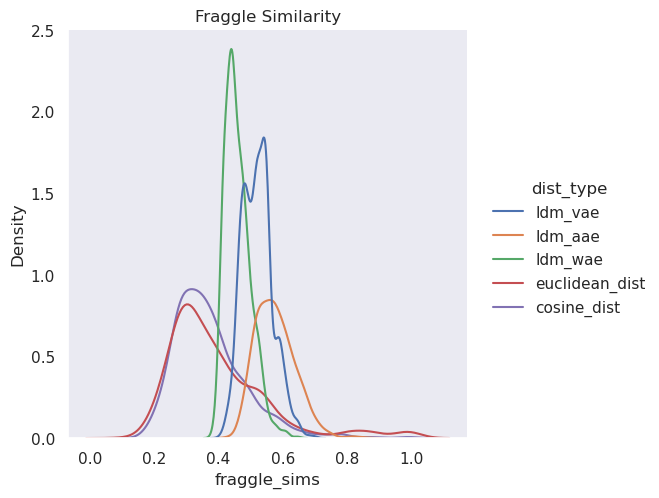

In [18]:
sns.set_theme()
sns.set_style("dark")
sns.displot(tgt,x = 'fraggle_sims',  hue="dist_type", kind = 'kde')


plt.title('Fraggle Similarity')
plt.savefig('../plots/structural_sim_ldm/wrong_fraggle_sims_1000.png', bbox_inches="tight")

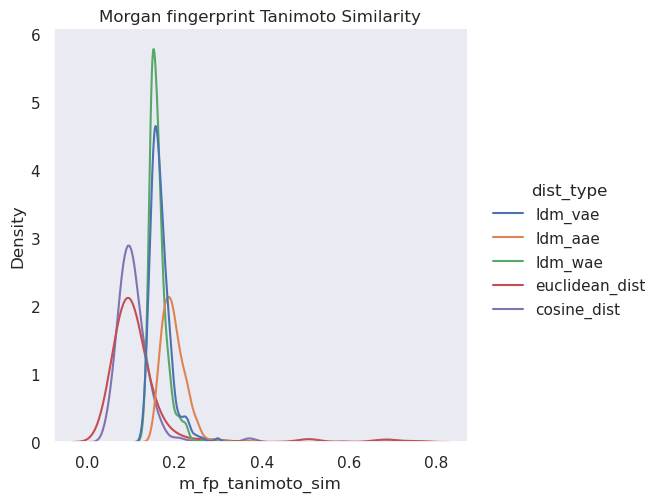

In [19]:
sns.displot(tgt,x = 'm_fp_tanimoto_sim',  hue="dist_type", kind = 'kde')
plt.title('Morgan fingerprint Tanimoto Similarity')
plt.savefig('../plots/structural_sim_ldm/wrong_morgan_sims_1000.png', bbox_inches="tight")

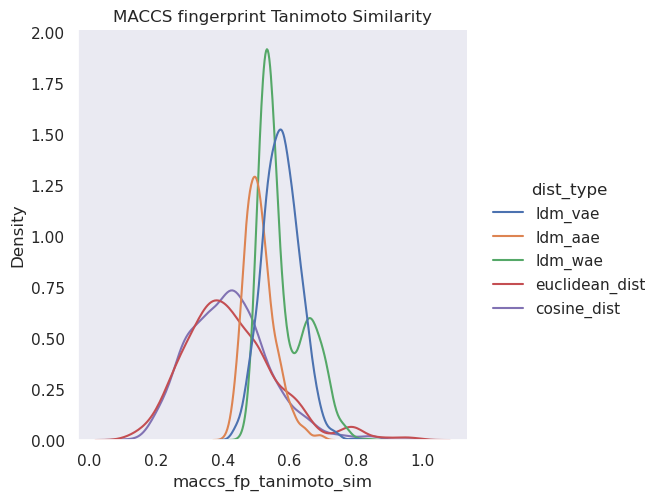

In [20]:
sns.displot(tgt,x = 'maccs_fp_tanimoto_sim',  hue="dist_type", kind = 'kde')
plt.title('MACCS fingerprint Tanimoto Similarity')
plt.savefig('../plots/structural_sim_ldm/wrong_maccs_sims_1000.png', bbox_inches="tight")

[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: >]


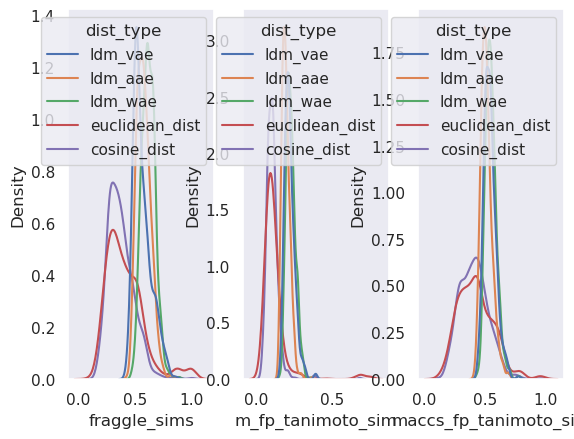

In [48]:
fig, axes = plt.subplots(1, 3)
print(axes)
sns.kdeplot(tgt,x = 'fraggle_sims',  hue="dist_type", ax=axes[0])
# axes[0].set(title='Fraggle Similarity')

sns.kdeplot(tgt,x = 'm_fp_tanimoto_sim',  hue="dist_type", ax=axes[1])
# axes[1].set(title='Morgan fingerprint Tanimoto Similarity')

sns.kdeplot(tgt,x = 'maccs_fp_tanimoto_sim',  hue="dist_type", ax=axes[2])
# axes[2].set(title='MACCS fingerprint Tanimoto Similarity')
plt.show()